<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [234]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [235]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

# To oversample the data
from imblearn.over_sampling import SMOTE

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend
from tensorflow.keras.optimizers import SGD

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [236]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [237]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
# Load the dataset
ds = pd.read_csv("/content/drive/MyDrive/Neural Networks/P7-BankChurnPredictionproject/Churn.csv")

In [239]:
# Create a copy of the original dataset
churn_data = ds.copy()

## Data Overview

In [240]:
# Display the first 5 rows of the data
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [241]:
# Display the last 5 rows of the data
churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [242]:
# Checking the number of rows and columns in the data
churn_data.shape

(10000, 14)

* The dataset has `10000 rows` and `14 columns`.



In [243]:
# Check the data types of the columns for the dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are `10,000`  observations and `14` columns in the data.
* 9 columns are of type `int64`, 2 columns are `float64` and 3 columns are of type `object`.

In [244]:
# Check the statistical summary of the numerical columns in the data
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* There are `10,000 rows` for all numerical columns.
* `CreditScore` mean value is `650.53` and range is from `350 to 850`.
* `Age` mean value is `38.92 years` and range is from `18 to 92 years`.
* `Tenure` mean value is `5.01 years` and range is from `0 to 10 years`.
* `Balance` mean value is `76,485.89` and range is from `0 to 250,898`.
* `EstimatedSalary` mean value is `100,090.24` and range is from `11.58 to 199,992.48`
* `Exited` (Target) mean value is `0.2037`. This indicates there is `~20.37% churn rate`.
* `NumOfProducts` ranges from `1 to 4`.
* Binary columns like `HasCrCard` and `IsActiveMember` show `~70.5%` and `~51.5%` of customers with credit cards and active memberships.
* `Balance` has a large standard deviation of `62,297` that indicates variability among customer balances.

In [245]:
# Check the number of unique values in each column
churn_data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


* `RowNumber`, `CustomerId` seems to be unique numbers for each row and for each customer.
* `Surname` seems to be not unique and not relevant for prediction.
* We can drop the columns: RowNumber, CustomerId and Surname.
* `Geography` has `3` unique values (`France`, `Spain`, `Germany`).
* `Gender` has `2` unique values: `Male` and `Female`.


In [246]:
# Check for duplicate values
churn_data.duplicated().sum()

0

* There are no duplicate rows in the dataset

In [247]:
# Check for missing values
churn_data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


* There are no missing values in the dataset.

In [248]:
# Check the percentage of customers that exited to the customers that stayed
churn_data['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


* There `79.63%` customers that did not leave while `20.37%` of customers that exited.

In [249]:
for i in churn_data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(churn_data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


* The Surname column appears non-informative for the target variable (`Exited`) and could be dropped.

In [250]:
# Drop the irrelevant columns that are not related to target variable (Exited)
churn_data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Display the first few rows to confirm the changes
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [251]:
# Define numerical and categorical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

### Univariate Analysis

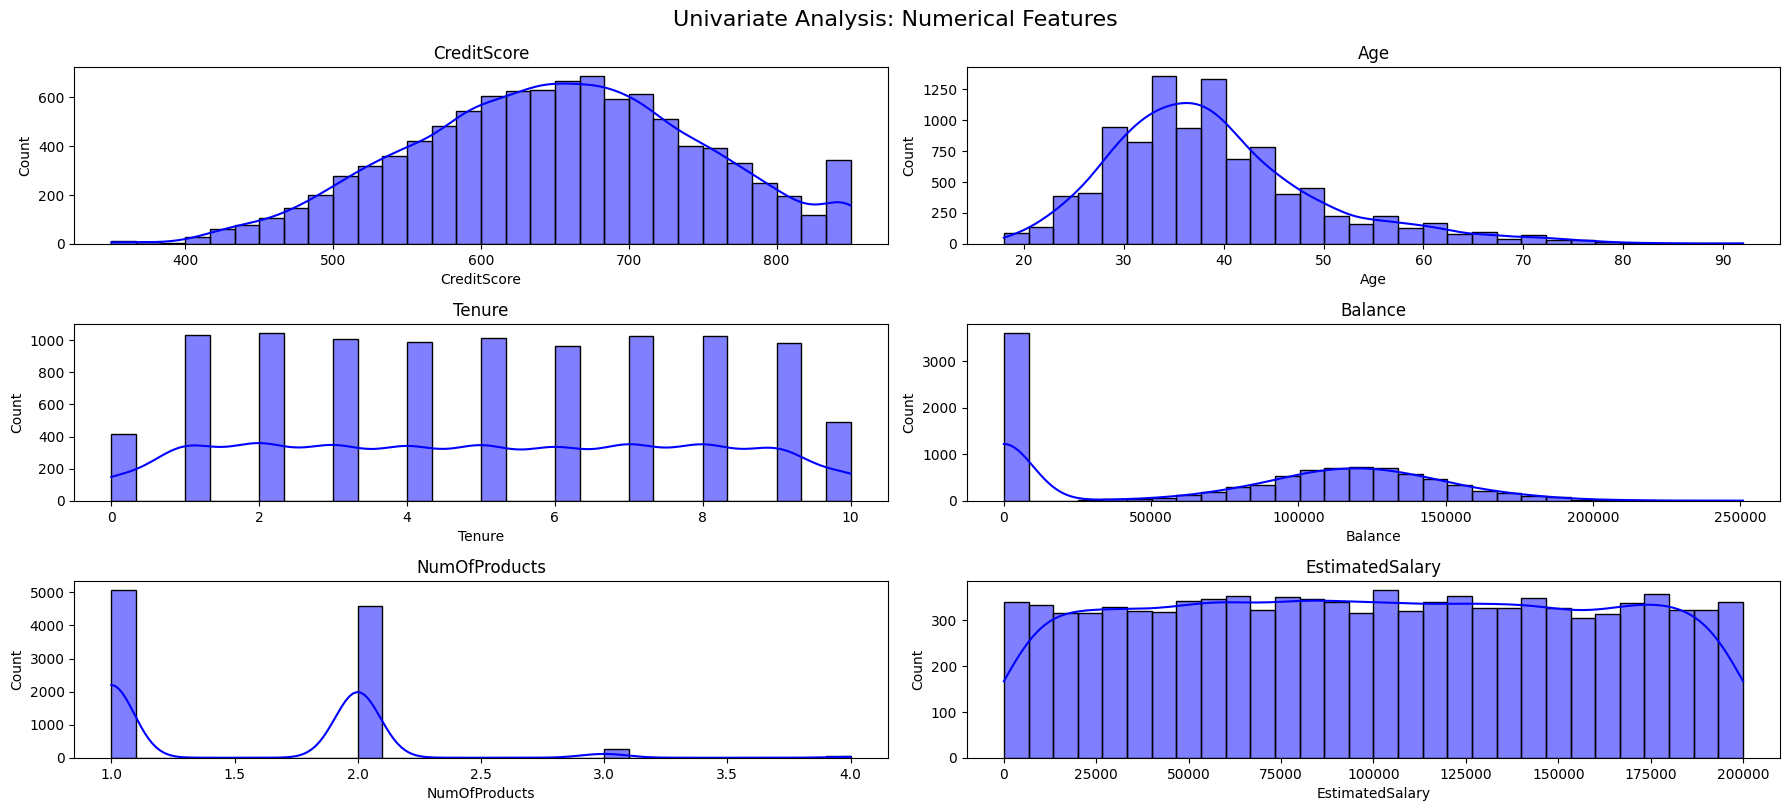

In [252]:
# Plotting histograms for numerical features
plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(4, 2, i)
    sns.histplot(churn_data[col], kde=True, bins=30, color="blue")
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Univariate Analysis: Numerical Features", fontsize=16, y=1.02)
plt.show()

**Univariate Analysis for Numerical features**

* CreditScore:
  * Typically distributed around the mean (`~650`).
  * Few customers have lower credit scores (`~350`), that might contribute to churn.
* Age:
  * Most customers are in their late `20s to 50s`.
  * Few customers are `above 60` and those might exhibit churn rates.
* Tenure:
  * Distribution is relatively uniform across the range of `0 to 10 years`.
  * This suggests customers have varying levels of loyalty.
* Balance:
  * A significant portion of customers has `zero balance`. This can be because of potentially dormant accounts.
  * Other customers have a wide range of balances, with some reaching very high values (`~250,000`).
* NumOfProducts:
  * Most customers use `1 or 2 products`, with very few using `3 or 4 products`.
* EstimatedSalary:
  * Uniformly distributed, showing no specific skew in customer salary ranges.

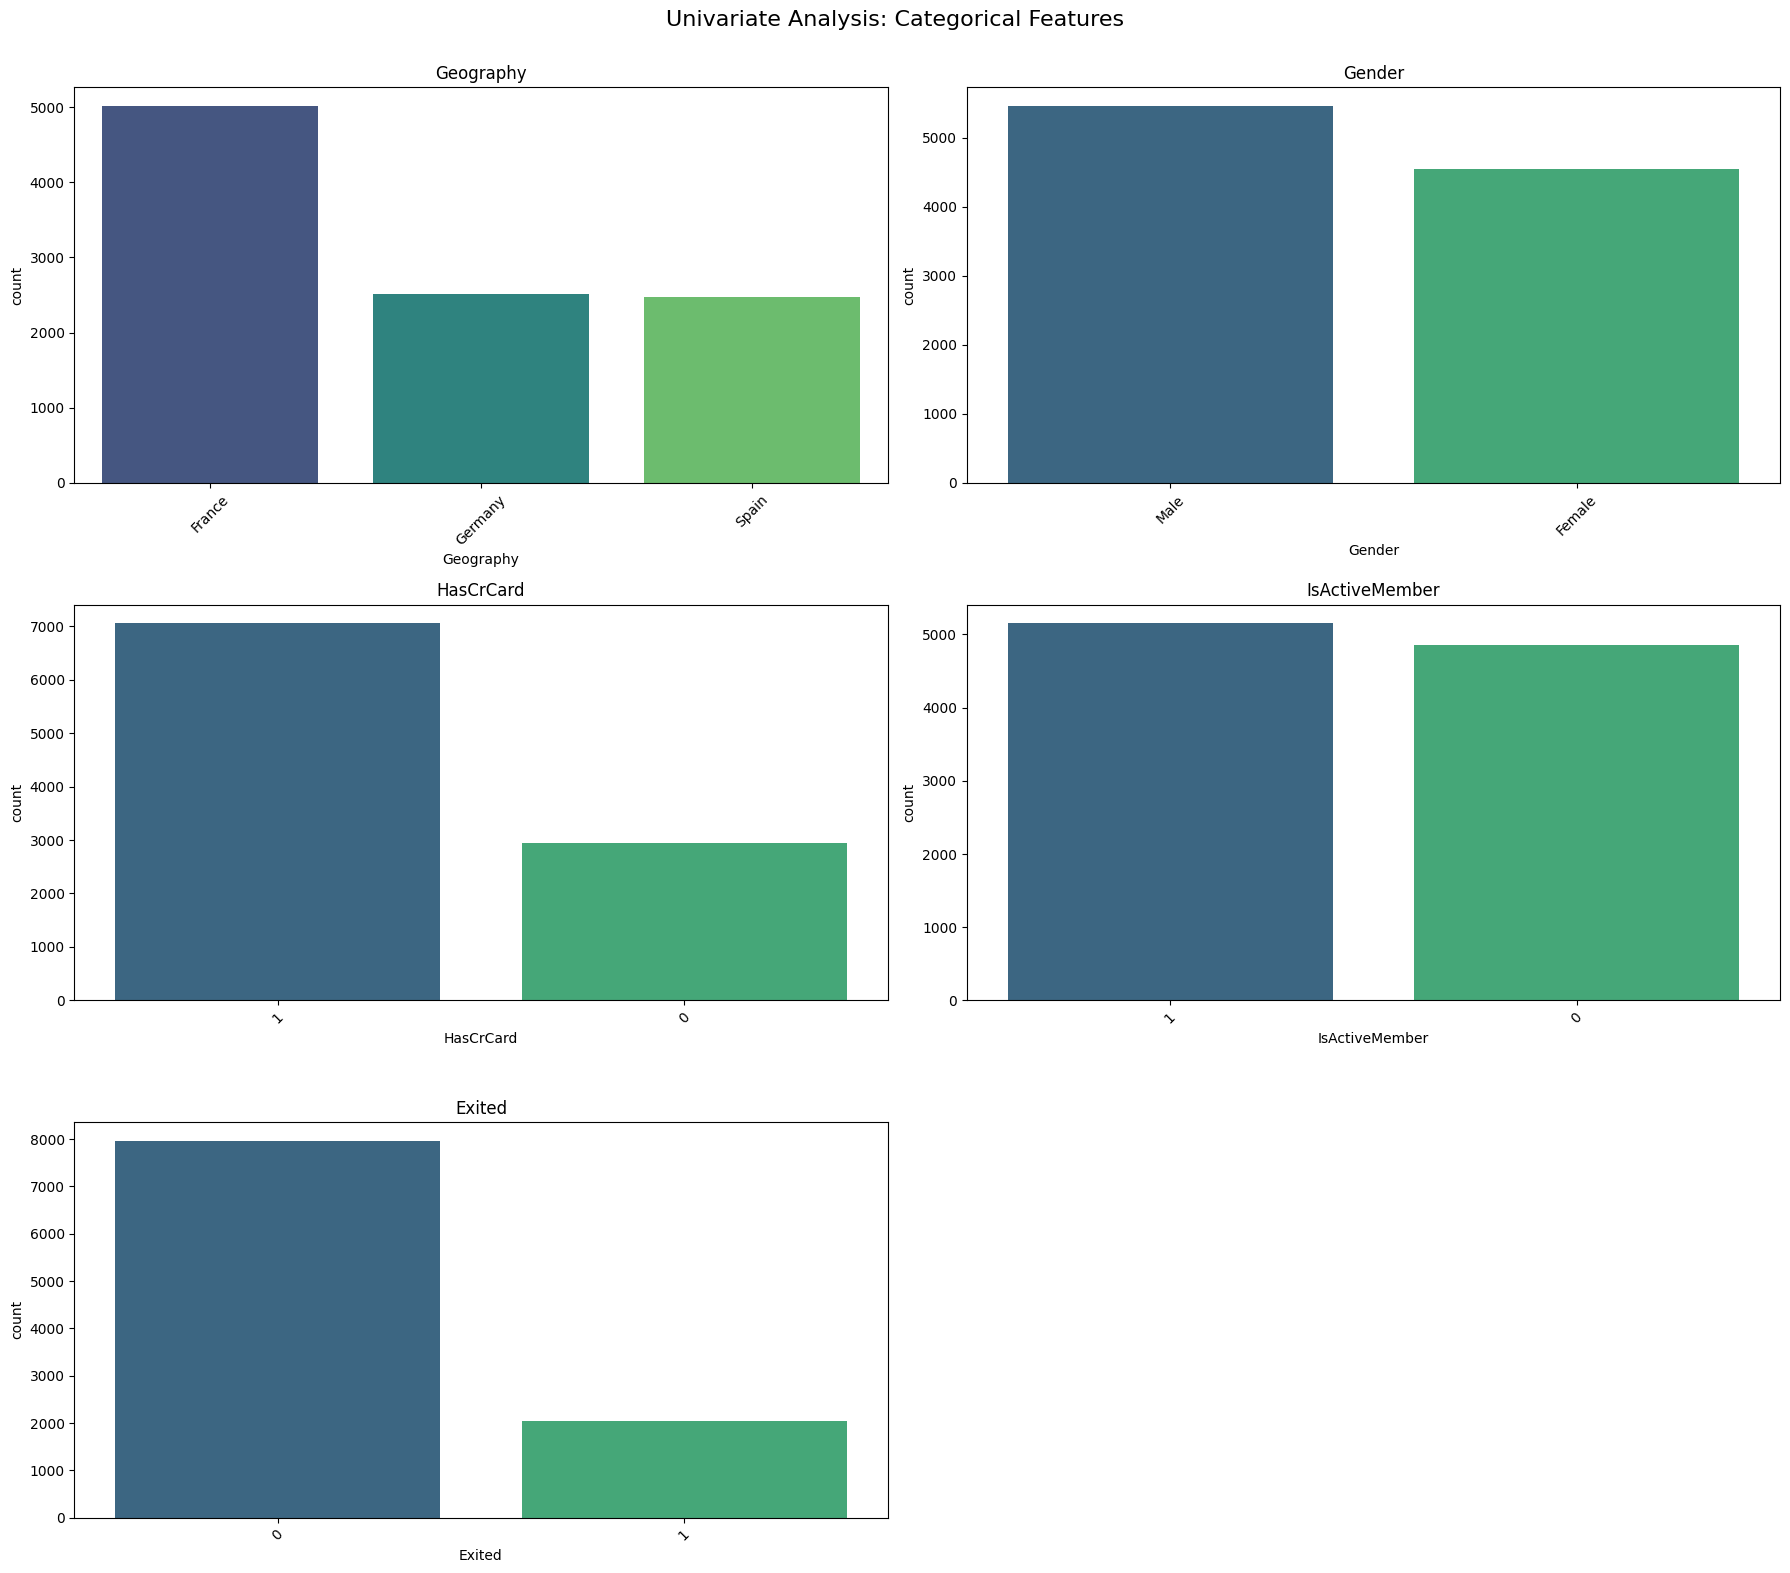

In [253]:
# Plotting barplots for categorical features
plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(4, 2, i)
    sns.countplot(data=churn_data, x=col, palette="viridis", order=churn_data[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Univariate Analysis: Categorical Features", fontsize=16, y=1.02)
plt.show()

**Univariate Analysis for Categorical features**
* Geography:
  * `France` has the largest customer base, followed by `Germany` and `Spain`.
* Gender:
  * `Males` are slightly more than `females`.
* Exited:
  * Around `20%` of customers have churned, confirming a class imbalance (important to be addressed during modeling)
* HasCrCard:
  * Most customers (`~70%`) have a credit card.
* IsActiveMember:
  * Roughly `50%` of customers are active members.

### Bivariate Analysis

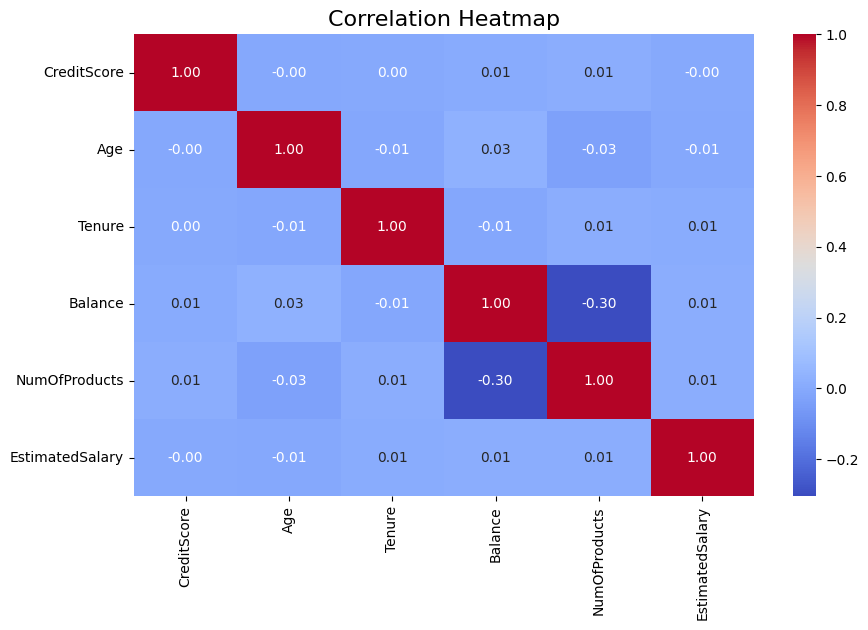

In [254]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
correlation = churn_data[numerical_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**Correlation Heatmap**
* Features like `Age`, `Balance`, and `NumOfProducts` show moderate correlations with each other.
* `CreditScore`, `EstimatedSalary`, and `Tenure` are relatively independent.

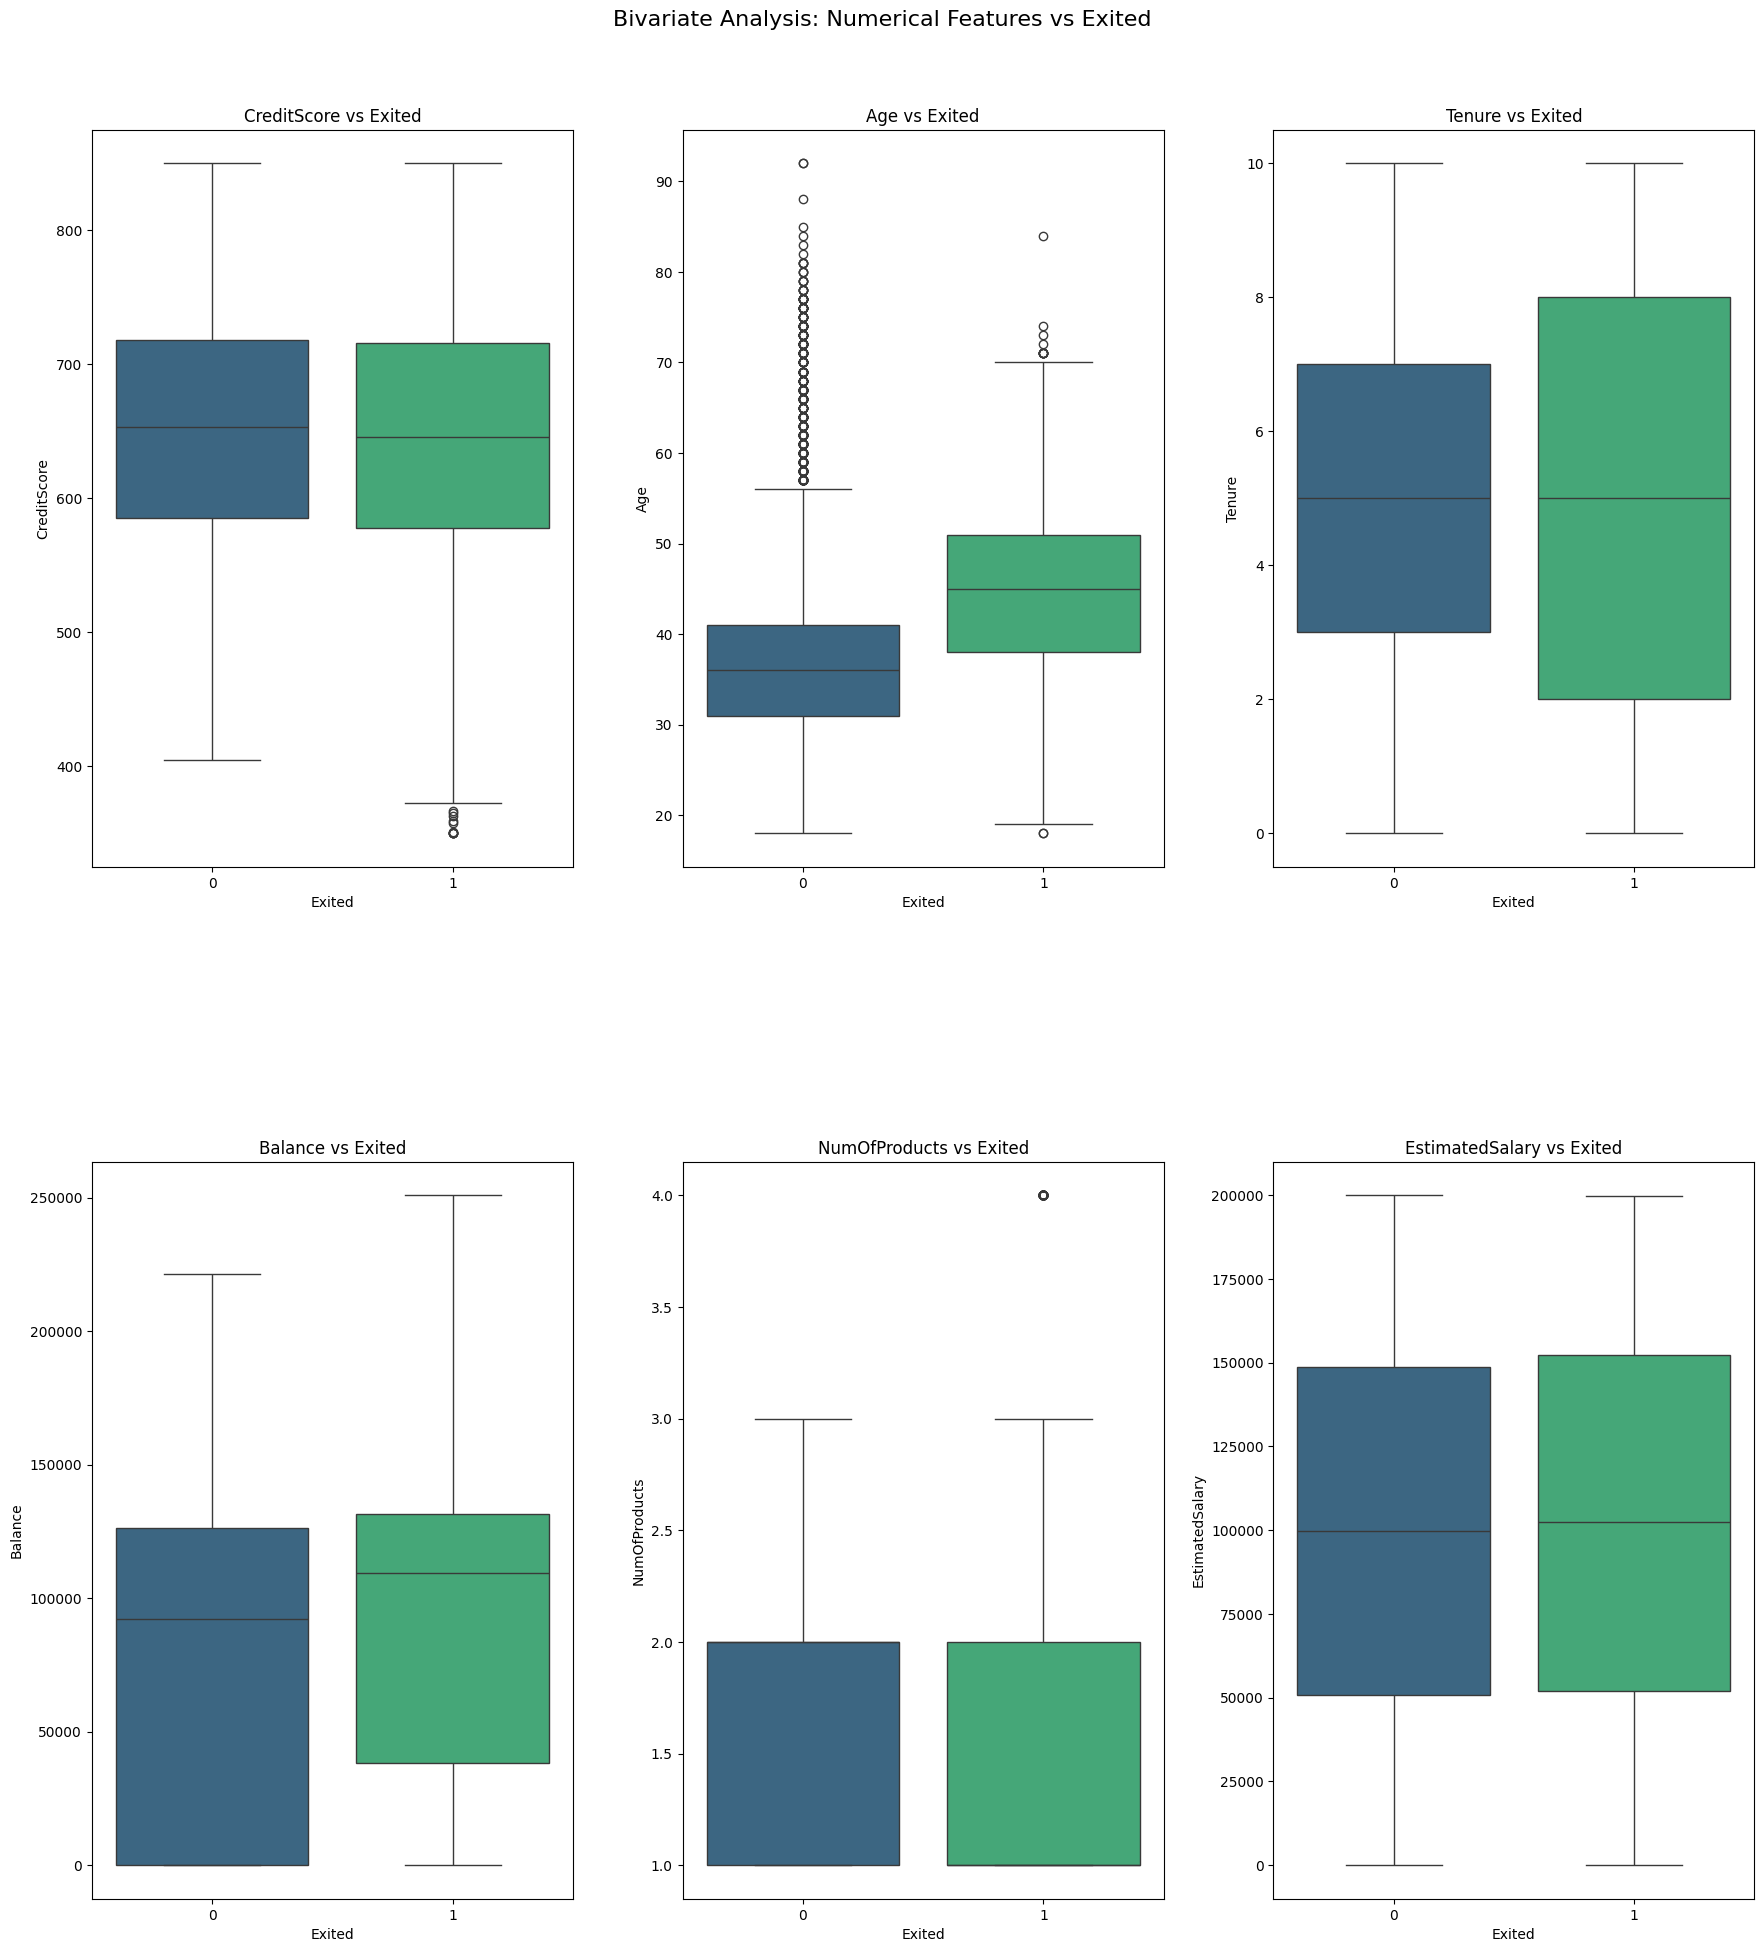

In [255]:
# Bivariate relationships with the target variable (Exited) for Numerical Features
plt.figure(figsize=(18, 20))
num_cols = 3  # Number of plots per row
num_rows = (len(numerical_columns) - 1) // num_cols + 1  # Calculate rows needed

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=churn_data, x="Exited", y=col, palette="viridis")
    plt.title(f"{col} vs Exited")
    plt.tight_layout(pad=2.0)

# Adjust spacing for the suptitle
plt.subplots_adjust(top=0.92, hspace=0.4)
plt.suptitle("Bivariate Analysis: Numerical Features vs Exited", fontsize=16)
plt.show()

**Numerical Features vs. Exited**
* Age vs. Exited:
  * Older customers (`above 50`) show higher churn rates.
  * Younger customers are less likely to churn.
* Balance vs. Exited:
  * Customers with `zero balance` are more likely to churn, possibly indicating inactive or dormant accounts.
* NumOfProducts vs. Exited:
  * Customers with `3 or more products` have a higher churn rate. Retaining these customers may require special attention.
* CreditScore vs. Exited:
  * Customers with `low credit scores` are more likely to churn.

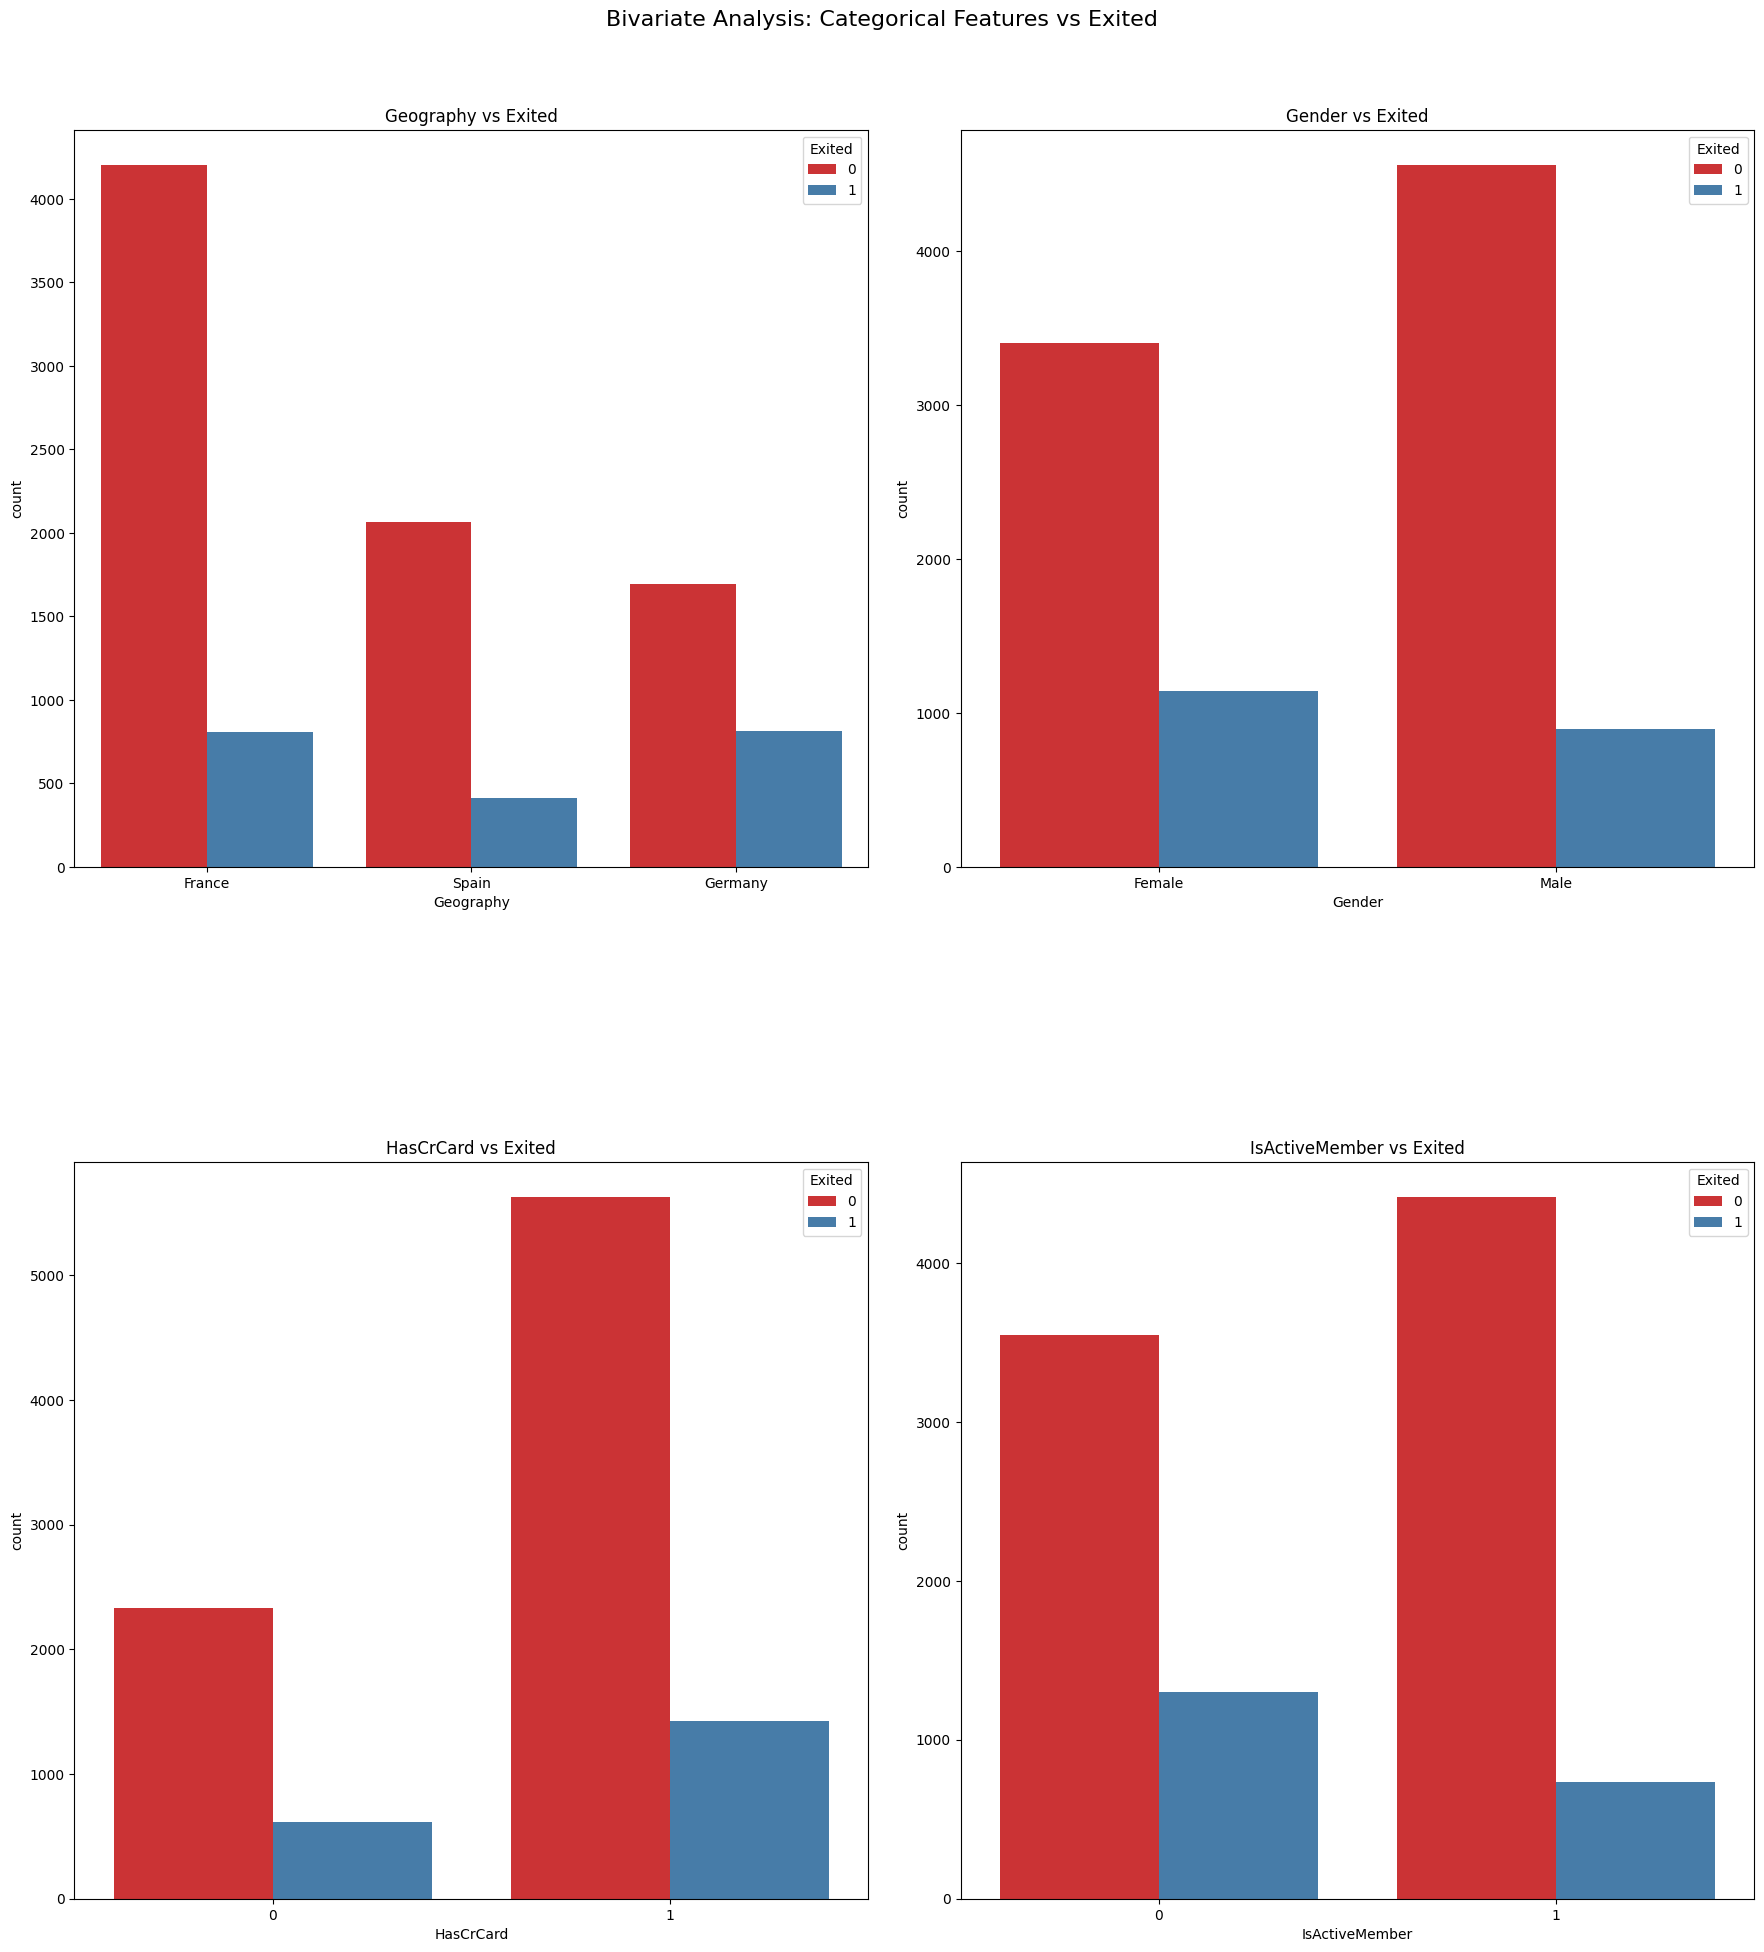

In [256]:
# Bivariate relationships with the target variable (Exited) for Categorical Features
plt.figure(figsize=(18, 20))
num_cols = 2  # Number of plots per row
num_rows = (len(categorical_columns) - 2) // num_cols + 1  # Calculate rows needed (excluding Exited)

for i, col in enumerate(categorical_columns):
    if col != 'Exited':
        plt.subplot(num_rows, num_cols, i + 1)
        sns.countplot(data=churn_data, x=col, hue="Exited", palette="Set1")
        plt.title(f"{col} vs Exited")
        plt.tight_layout(pad=2.0)

# Adjust spacing for the suptitle
plt.subplots_adjust(top=0.92, hspace=0.4)
plt.suptitle("Bivariate Analysis: Categorical Features vs Exited", fontsize=16)
plt.show()

**Categorical Features vs. Exited**
* Geography vs. Exited:
  * Customers from `Germany` exhibit a higher churn rate compared to `France` and `Spain`.
* Gender vs. Exited:
  * `Males` and `Females` show similar churn rates with no strong dependency observed.
* IsActiveMember vs. Exited:
  * Active members churn less frequently compared to inactive ones.
* HasCrCard vs.Exited:
  * Owning a credit card has little to no impact on churn.

## Data Preprocessing

### Dummy Variable Creation

In [257]:
# Print the object types
churn_data.select_dtypes(include=["object"]).columns.tolist()

['Geography', 'Gender']

In [258]:
# Define features and target
X = churn_data.drop(columns=['Exited'])
Y = churn_data['Exited']


In [259]:
# Now create the Dummy variables for the categorical columns
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
X = X.astype(float)

In [260]:
# Print the first 5 rows after one-hot encoding and assigning float data type to new columns
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,0.0


In [261]:
# Check the datatypes of all the columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  float64
 9   Geography_Spain    10000 non-null  float64
 10  Gender_Male        10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


### Train-validation-test Split

In [262]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [263]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [264]:
# Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


In [265]:
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

### Data Normalization

In [266]:
# Standardize the data
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_valid[numerical_columns] = scaler.transform(X_valid[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [267]:
# Verify if the numerical_columns matches the feature names in the dataset
# Verify X_train, X_val, and X_test are all properly structured dataframes
print(X_train[numerical_columns].head())
print(X_valid[numerical_columns].head())
print(X_test[numerical_columns].head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  \
3006     0.988678  0.572685 -1.384980  0.610704      -0.909878   
5735    -0.683985  0.477619 -0.355056 -1.237347       0.804346   
5652     0.410474 -0.948376  1.361485 -1.237347       0.804346   
26       1.081604 -0.282911 -1.041672  0.962063      -0.909878   
3596    -0.085130 -0.282911 -1.728288  1.144427      -0.909878   

      EstimatedSalary  
3006         1.566070  
5735         0.036348  
5652         1.745403  
26           1.228816  
3596        -0.764748  
      CreditScore       Age    Tenure   Balance  NumOfProducts  \
7140     0.534375  0.002288  0.331561  1.217181      -0.909878   
7334    -0.363907 -1.994105  0.331561 -1.237347       0.804346   
1651    -0.178056 -0.758243  1.361485  0.508998      -0.909878   
2953    -0.012855  0.382553  0.331561 -1.237347       0.804346   
1785     0.637625  0.097354 -0.698364  0.602468       0.804346   

      EstimatedSalary  
7140         1.466462  
7334        -1

## Model Building

### Model Evaluation Criterion

The goal is to predict customer churn (Exited) for a bank. In this scenario, the cost of missclassification must guide the choice of the evaluation metric.

**Understanding the business impact of errors:**
1. False Negatives (FN):
  * Predicting a customer will not churn when they actually will.
  * Impact: The bank misses an opportunity to retain the customer, potentially leading to loss of revenue and reputation.
  * Cost: High, as retaining a customer is generally cheaper than acquiring a new one.
2. False Positives(FP):
  * Predicting a customer will churn when they will not.
  * Impact: The bank invests resources in retention strategies for customers who would have stayed regardless.
  * Cost: Moderate, as it results in unnecessary expenses but does not lose the customer.

**Metric Trade-offs**
* Accuracy - Measures overall correctiveness of predictions.
* Precision - Measures the proportion of correctly predicted churners out of all predicted churners. We need to use this if reducing unnecessary retention efforts (false positives) is the top priority.
* Recall - Measures the proportion of actual churners correctly identified. We need to use this if capturing all churners (minimizing false negatives) is the top priority.
* F1-Score - Harmonic mean of precision and recall, balancing both metrics. Use this if precision and recall are equally important.

**Which case is more important?**
Based on the scenario:
* Minimizing False Negatives is key:
  * False negatives result in churners being ovrelooked, leading to revenue loss. The bank should prioritize identifying at-risk customers.
* Recall as the Primary Metric:
  * A high recall ensures most churners are identified, even if it means some additional false positives.
* Other metrics to consider:
  * Precision is useful if the bank wants to optimize retention costs.
  * F1-Score balances precision and recall if both are important.

**Decision:**

Use **Recall** as a primary metric to identify as many churners as possible and if needed, precision or F1-Score to balance recall and retention cost as a secondary metric.


In [268]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [269]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

In [270]:
# Utility function for plotting the loss/accuracy
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [271]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Neural Network with SGD Optimizer

Let's start with a neural network consisting of
* two hidden layers with `14` and `7` neurons respectively
* activation function of `ReLU`.
* `SGD` as the optimizer

In [272]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [273]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [274]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [275]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [276]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 3s 12ms/step - loss: 1.4643 - val_loss: 0.7431
Epoch 2/25
100/100 [==============================] - 1s 9ms/step - loss: 1.3973 - val_loss: 0.7052
Epoch 3/25
100/100 [==============================] - 1s 11ms/step - loss: 1.3785 - val_loss: 0.6932
Epoch 4/25
100/100 [==============================] - 1s 12ms/step - loss: 1.3644 - val_loss: 0.6869
Epoch 5/25
100/100 [==============================] - 1s 10ms/step - loss: 1.3485 - val_loss: 0.6835
Epoch 6/25
100/100 [==============================] - 1s 8ms/step - loss: 1.3273 - val_loss: 0.6782
Epoch 7/25
100/100 [==============================] - 1s 10ms/step - loss: 1.2996 - val_loss: 0.6718
Epoch 8/25
100/100 [==============================] - 1s 6ms/step - loss: 1.2673 - val_loss: 0.6592
Epoch 9/25
100/100 [==============================] - 1s 6ms/step - loss: 1.2344 - val_loss: 0.6487
Epoch 10/25
100/100 [==============================] - 1s 7ms/step - loss: 1.2033 - val_loss: 0

In [277]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.976747751235962


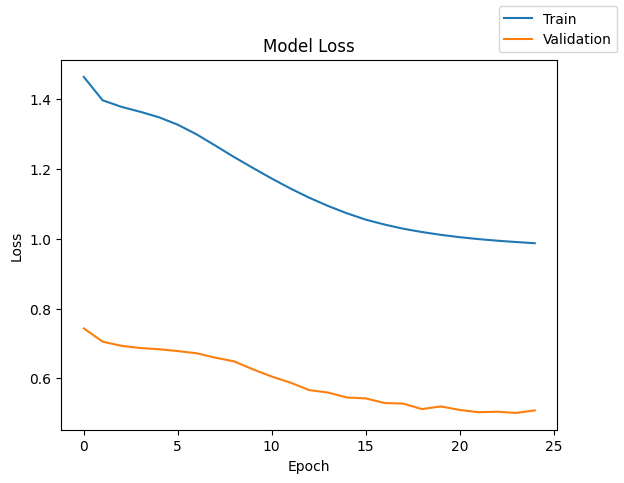

In [278]:
plot(history,'loss')

In [279]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.754062,0.754062,0.827223,0.774403


In [280]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.743125,0.743125,0.825865,0.765333


**Observations**

* **Accuracy** - Slight drop from `75.41%` (`train`) to `74.31%` (`validation`), which is normal and suggests the model generalizes reasonably well.
* **Recall** - Similar drop from `75.41%` to `74.31%` showing consistent performance in identifying positive cases.
* **Precision** - Almost unchanged indicating the model maintains its ability to minimize false positives.
* **F1 Score** - Slight decline from `77.44%` (`train`) to `76.53%` (`validation`) which aligns with the other metrics.

Overall,
* The model generalizes well from training to validation, with minimal overfitting.
* Metrics like precision and recall are consistent across sets.
* Slight drop in accuracy and F1 Score suggests potential for optimization in recall.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [281]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [282]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [283]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [284]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [285]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 5ms/step - loss: 1.4321 - val_loss: 0.6592
Epoch 2/25
100/100 [==============================] - 0s 4ms/step - loss: 1.2840 - val_loss: 0.6157
Epoch 3/25
100/100 [==============================] - 0s 4ms/step - loss: 1.2009 - val_loss: 0.6112
Epoch 4/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1453 - val_loss: 0.5784
Epoch 5/25
100/100 [==============================] - 0s 4ms/step - loss: 1.1035 - val_loss: 0.5500
Epoch 6/25
100/100 [==============================] - 0s 3ms/step - loss: 1.0692 - val_loss: 0.5275
Epoch 7/25
100/100 [==============================] - 0s 3ms/step - loss: 1.0402 - val_loss: 0.5317
Epoch 8/25
100/100 [==============================] - 0s 4ms/step - loss: 1.0157 - val_loss: 0.5174
Epoch 9/25
100/100 [==============================] - 0s 3ms/step - loss: 0.9975 - val_loss: 0.5278
Epoch 10/25
100/100 [==============================] - 0s 4ms/step - loss: 0.9843 - val_loss: 0.5108

In [286]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.460586309432983


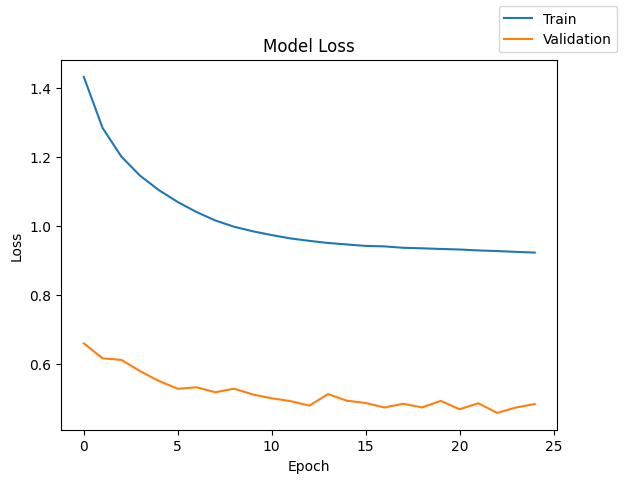

In [287]:
plot(history,'loss')

In [288]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.777813,0.777813,0.839582,0.795102


In [289]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.76125,0.76125,0.829212,0.780447


**Observations**
* **Improved Performance** - Across all metrics, the Adam Optimizer outperforms SGD on both training and validation sets.
* Training Accuracy improved from `75.41% (SGD)` to `77.78% (Adam)`.
* Validation Accuracy improved from `74.31% (SGD)` to `76.13% (Adam)`.
* **Better Recall** - The recall increased slightly for both training and validation sets when using Adam indicating the model captures more positive cases.
* **High Precision maintained** - Both optimizers achieved high precision (`Adam: 83.96%`, `SGD:82.72%`) showing good control over false positives.
* **F1 Score** - Improved from `77.44% (SGD)` to `79.51% (Adam)` on training data and from `76.53% (SGD)` to `78.04% (Adam)` on validation data.

Overall, The Adam Optimizer demonstrates better performance and generalization than SGD.


### Neural Network with Adam Optimizer and Dropout

In [290]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [291]:
#Initializing the neural network with dropouts
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [292]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [293]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [294]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 5ms/step - loss: 1.4330 - val_loss: 0.6244
Epoch 2/25
100/100 [==============================] - 0s 4ms/step - loss: 1.3337 - val_loss: 0.5970
Epoch 3/25
100/100 [==============================] - 0s 4ms/step - loss: 1.3048 - val_loss: 0.5918
Epoch 4/25
100/100 [==============================] - 0s 3ms/step - loss: 1.2712 - val_loss: 0.5799
Epoch 5/25
100/100 [==============================] - 0s 4ms/step - loss: 1.2544 - val_loss: 0.5777
Epoch 6/25
100/100 [==============================] - 0s 4ms/step - loss: 1.2282 - val_loss: 0.5657
Epoch 7/25
100/100 [==============================] - 0s 4ms/step - loss: 1.2159 - val_loss: 0.5597
Epoch 8/25
100/100 [==============================] - 0s 4ms/step - loss: 1.1933 - val_loss: 0.5423
Epoch 9/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1803 - val_loss: 0.5470
Epoch 10/25
100/100 [==============================] - 0s 4ms/step - loss: 1.1655 - val_loss: 0.5368

In [295]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.252792835235596


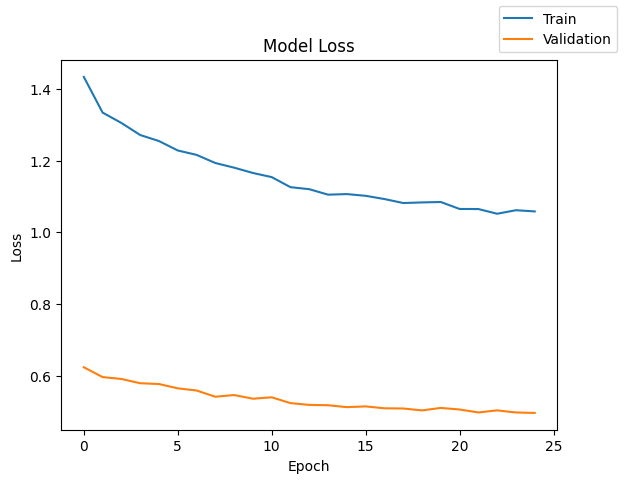

In [296]:
plot(history,'loss')

In [297]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7925,0.7925,0.837853,0.806433


In [298]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7725,0.7725,0.826072,0.788897


**Observations**
* Adding Dropout has improved the generalization of the model, reducing overfitting and boosting validation performance.
* Metrics like recall and F1 Score have improved, which is critical for identifying churners effectively.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [299]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [300]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1304
Before OverSampling, count of label '0': 5096 

After OverSampling, count of label '1': 5096
After OverSampling, count of label '0': 5096 

After OverSampling, the shape of train_X: (10192, 11)
After OverSampling, the shape of train_y: (10192,) 



In [301]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [302]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [303]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [304]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [305]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
160/160 [==============================] - 1s 4ms/step - loss: 1.5718 - val_loss: 1.1591
Epoch 2/25
160/160 [==============================] - 1s 4ms/step - loss: 1.4205 - val_loss: 1.0832
Epoch 3/25
160/160 [==============================] - 1s 4ms/step - loss: 1.3466 - val_loss: 1.0977
Epoch 4/25
160/160 [==============================] - 1s 4ms/step - loss: 1.2971 - val_loss: 1.0358
Epoch 5/25
160/160 [==============================] - 1s 4ms/step - loss: 1.2578 - val_loss: 1.0377
Epoch 6/25
160/160 [==============================] - 1s 4ms/step - loss: 1.2229 - val_loss: 0.9999
Epoch 7/25
160/160 [==============================] - 1s 4ms/step - loss: 1.1913 - val_loss: 0.9434
Epoch 8/25
160/160 [==============================] - 1s 4ms/step - loss: 1.1662 - val_loss: 0.9359
Epoch 9/25
160/160 [==============================] - 1s 4ms/step - loss: 1.1455 - val_loss: 0.9426
Epoch 10/25
160/160 [==============================] - 1s 3ms/step - loss: 1.1293 - val_loss: 0.8272

In [306]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.003103971481323


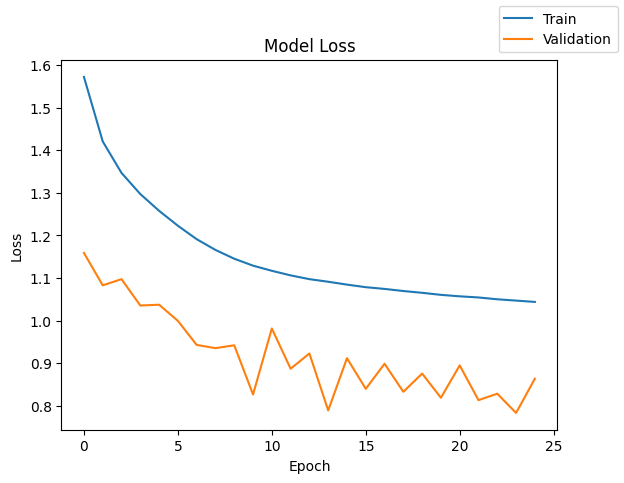

In [307]:
plot(history,'loss')

In [308]:
model_3_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_3_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.70575,0.70575,0.77659,0.68562


In [309]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.53875,0.53875,0.824091,0.571681


**Observations**

* SMOTE has helped improve recall on the training set by balancing the dataset.
* However, validation accuracy and recall dropped, possibly due to the model overfitting to synthetic samples.
* While precision remains strong, recall is lower for validation, suggesting the model struggles to generalize to unseen data.
* The gap between training and validation performance highlights overfitting to the SMOTE-balanced data.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [310]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [311]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1304
Before OverSampling, count of label '0': 5096 

After OverSampling, count of label '1': 5096
After OverSampling, count of label '0': 5096 

After OverSampling, the shape of train_X: (10192, 11)
After OverSampling, the shape of train_y: (10192,) 



In [312]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [313]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [314]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [315]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [316]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
160/160 [==============================] - 2s 7ms/step - loss: 1.5752 - val_loss: 1.0806
Epoch 2/25
160/160 [==============================] - 1s 5ms/step - loss: 1.3038 - val_loss: 0.9976
Epoch 3/25
160/160 [==============================] - 1s 6ms/step - loss: 1.1936 - val_loss: 0.9623
Epoch 4/25
160/160 [==============================] - 1s 6ms/step - loss: 1.1327 - val_loss: 0.9022
Epoch 5/25
160/160 [==============================] - 1s 4ms/step - loss: 1.1001 - val_loss: 0.9306
Epoch 6/25
160/160 [==============================] - 1s 4ms/step - loss: 1.0845 - val_loss: 0.8992
Epoch 7/25
160/160 [==============================] - 1s 4ms/step - loss: 1.0728 - val_loss: 0.8356
Epoch 8/25
160/160 [==============================] - 1s 4ms/step - loss: 1.0661 - val_loss: 0.8882
Epoch 9/25
160/160 [==============================] - 1s 4ms/step - loss: 1.0602 - val_loss: 0.8687
Epoch 10/25
160/160 [==============================] - 1s 4ms/step - loss: 1.0539 - val_loss: 0.8524

In [317]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.341920614242554


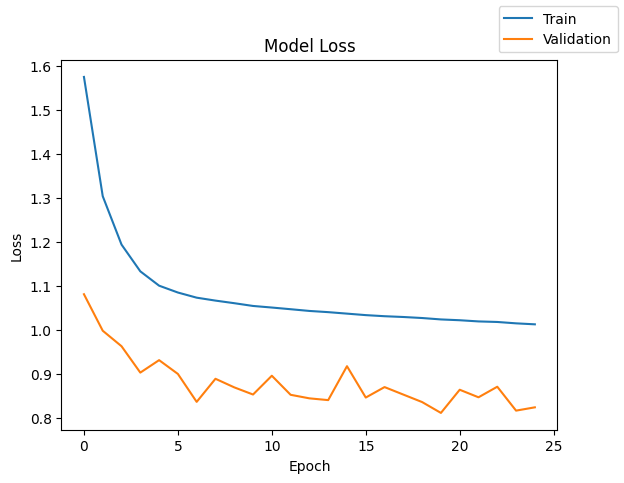

In [318]:
plot(history,'loss')

In [319]:
model_4_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_4_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.727041,0.727041,0.786919,0.712016


In [320]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.57125,0.57125,0.825142,0.606183


**Observations**
* Adam Optimizer has outperformed SGD on both training and validation sets.
* Validation accuracy and F1 Score have increased, but still there is a noticeable performance gap between training and validation.
* The gap between training and validation metrics suggests overfitting to the SMOTE-generated synthetic data.


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [321]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [322]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1304
Before OverSampling, count of label '0': 5096 

After OverSampling, count of label '1': 5096
After OverSampling, count of label '0': 5096 

After OverSampling, the shape of train_X: (10192, 11)
After OverSampling, the shape of train_y: (10192,) 



In [323]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [324]:
#Initializing the neural network with dropouts
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [325]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [326]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [327]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
160/160 [==============================] - 2s 4ms/step - loss: 1.5532 - val_loss: 1.0476
Epoch 2/25
160/160 [==============================] - 1s 4ms/step - loss: 1.4174 - val_loss: 1.0318
Epoch 3/25
160/160 [==============================] - 1s 4ms/step - loss: 1.3592 - val_loss: 0.9983
Epoch 4/25
160/160 [==============================] - 1s 4ms/step - loss: 1.3027 - val_loss: 0.9461
Epoch 5/25
160/160 [==============================] - 1s 6ms/step - loss: 1.2557 - val_loss: 0.9609
Epoch 6/25
160/160 [==============================] - 1s 4ms/step - loss: 1.2517 - val_loss: 0.9358
Epoch 7/25
160/160 [==============================] - 1s 4ms/step - loss: 1.2433 - val_loss: 0.9045
Epoch 8/25
160/160 [==============================] - 1s 4ms/step - loss: 1.2353 - val_loss: 0.9330
Epoch 9/25
160/160 [==============================] - 1s 4ms/step - loss: 1.2207 - val_loss: 0.9188
Epoch 10/25
160/160 [==============================] - 1s 4ms/step - loss: 1.2062 - val_loss: 0.9110

In [328]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.383625984191895


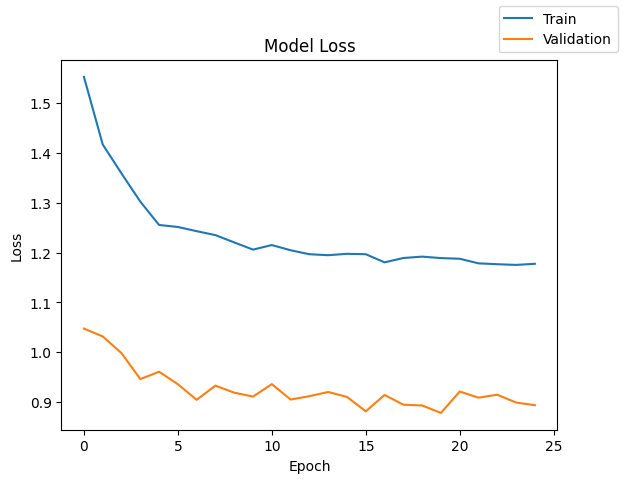

In [329]:
plot(history,'loss')

In [330]:
model_5_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_5_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.695349,0.695349,0.773736,0.671858


In [331]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.516875,0.516875,0.827137,0.546953


**Observations**
* The significant drop in validation metrics suggests that the model struggles to generalize due to `over-regularization` and `potential noise` from SMOTE data.
* Precision remains high but recall has dropped significantly, leading to missed positive (churn) cases.

## Model Performance Comparison and Final Model Selection

In [332]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer, Drop Out[0.4,0.2])",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam,dropout [0.4,0.2] ,Adam optimizer)",
]

In [333]:
# Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer, Drop Out[0.4,0.2])",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam,dropout [0.4,0.2] ,Adam optimizer)",
]

In [334]:
models_train_comp_df

,Neural Network (SGD Optimizer),Neural Network (Adam Optimizer),"Neural Network (Adam Optimizer, Drop Out[0.4,0.2])","Neural Network (SGD, SMOTE)","Neural Network (Adam, SMOTE)","Neural Network (Adam,dropout [0.4,0.2] ,Adam optimizer)"
Accuracy,0.754062,0.777813,0.792500,0.70575,0.727041,0.695349
Recall,0.754062,0.777813,0.792500,0.70575,0.727041,0.695349
Precision,0.827223,0.839582,0.837853,0.77659,0.786919,0.773736
F1 Score,0.774403,0.795102,0.806433,0.68562,0.712016,0.671858


In [335]:
models_valid_comp_df

,Neural Network (SGD Optimizer),Neural Network (Adam Optimizer),"Neural Network (Adam Optimizer, Drop Out[0.4,0.2])","Neural Network (SGD, SMOTE)","Neural Network (Adam, SMOTE)","Neural Network (Adam,dropout [0.4,0.2] ,Adam optimizer)"
Accuracy,0.743125,0.761250,0.772500,0.538750,0.571250,0.516875
Recall,0.743125,0.761250,0.772500,0.538750,0.571250,0.516875
Precision,0.825865,0.829212,0.826072,0.824091,0.825142,0.827137
F1 Score,0.765333,0.780447,0.788897,0.571681,0.606183,0.546953


In [336]:
models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]

,Recall
Neural Network (SGD Optimizer),0.010937
Neural Network (Adam Optimizer),0.016563
"Neural Network (Adam Optimizer, Drop Out[0.4,0.2])",0.020000
"Neural Network (SGD, SMOTE)",0.167000
"Neural Network (Adam, SMOTE)",0.155791
"Neural Network (Adam,dropout [0.4,0.2] ,Adam optimizer)",0.178474


Final Model: **Neural Network with Adam Optimizer**

Reasoning:
* Small recall difference `(0.010781)` indicates `good generalization`.
* Better recall and F1 Score compared to SGD.
* Adam optimizes learning more efficiently due to adaptive learning rates.


**Final Model**

Neural network consisting of `2 hidden layers` with `14` and `7` neurons with activation fundtion of `ReLU`. Using `Adam` as the `optimizer`.

In [337]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [338]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [339]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [340]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [341]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 5ms/step - loss: 1.3106 - val_loss: 0.6113
Epoch 2/25
100/100 [==============================] - 0s 4ms/step - loss: 1.2213 - val_loss: 0.5914
Epoch 3/25
100/100 [==============================] - 0s 4ms/step - loss: 1.1620 - val_loss: 0.5939
Epoch 4/25
100/100 [==============================] - 1s 5ms/step - loss: 1.1157 - val_loss: 0.5713
Epoch 5/25
100/100 [==============================] - 1s 6ms/step - loss: 1.0730 - val_loss: 0.5506
Epoch 6/25
100/100 [==============================] - 0s 5ms/step - loss: 1.0382 - val_loss: 0.5227
Epoch 7/25
100/100 [==============================] - 0s 5ms/step - loss: 1.0137 - val_loss: 0.5254
Epoch 8/25
100/100 [==============================] - 1s 5ms/step - loss: 0.9968 - val_loss: 0.5061
Epoch 9/25
100/100 [==============================] - 1s 5ms/step - loss: 0.9838 - val_loss: 0.5158
Epoch 10/25
100/100 [==============================] - 1s 6ms/step - loss: 0.9750 - val_loss: 0.5112

In [342]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [343]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      5096
           1       0.47      0.78      0.59      1304

    accuracy                           0.78      6400
   macro avg       0.70      0.78      0.72      6400
weighted avg       0.84      0.78      0.79      6400



**Observations:**
* The model performs well in identifying non-churners with high precision and F1-Score.
* Churners are moderately well identified, with good recall (`0.78`) but lower precision (`0.47`)

In [344]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1274
           1       0.45      0.77      0.56       326

    accuracy                           0.76      1600
   macro avg       0.69      0.76      0.70      1600
weighted avg       0.83      0.76      0.78      1600



**Observations:**
* There is a slight drop in recall for Class 0 and a balanced recall for churners.
* Precision for churners (`0.45`) remains a limitation, but the F1-Score shows an acceptable balance.

In [345]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1593
           1       0.45      0.77      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



**Observations:**
* Consistent performance across the test set validates the model's generalization capability.
* High recall (`0.77`) for churners demonstrates the model's effectiveness in minimizing missed churners.

**Final Recommendation**
* The Neural Network with Adam Optimizer is a strong candidate.
* To further improve precision for churners, we can adjust the classification threshold.

**Threshold Tuning for Improved Precision and Recall**

In [346]:
#Get the probabilities for the positive class (Churners)
y_val_probs = model.predict(X_valid)

50/50 [==============================] - 0s 2ms/step


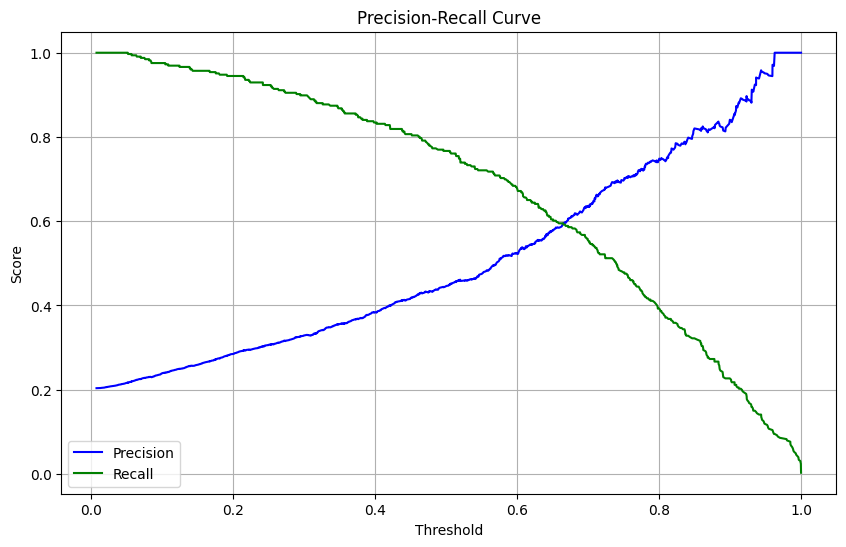

In [351]:
#Use precision_recall_curve to analyze how precision and recall vary as the threshold changes.
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_valid, y_val_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="green")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


**Observations**
* After analyzing the Precision-Recall Curve, `0.4` can be identified as the point where recall is sufficiently high without sacrificing too much precision.


In [348]:
optimal_threshold = 0.4  # Replace with the chosen threshold.
#Since our goal is to minimize false negatives (missed churners) is critical, choose a threshold that maximizes recall.
y_val_preds = (y_val_probs > optimal_threshold).astype(int)

In [349]:
#Recalculate the classification metrics for the validation and test sets
from sklearn.metrics import classification_report

print("Validation Set Performance:")
print(classification_report(y_valid, y_val_preds))

y_test_probs = model.predict(X_test)
y_test_preds = (y_test_probs > optimal_threshold).astype(int)

print("Test Set Performance:")
print(classification_report(y_test, y_test_preds))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1274
           1       0.38      0.83      0.53       326

    accuracy                           0.69      1600
   macro avg       0.66      0.75      0.65      1600
weighted avg       0.83      0.69      0.72      1600

63/63 [==============================] - 0s 2ms/step
Test Set Performance:
              precision    recall  f1-score   support

           0       0.95      0.66      0.77      1593
           1       0.39      0.85      0.53       407

    accuracy                           0.70      2000
   macro avg       0.67      0.75      0.65      2000
weighted avg       0.83      0.70      0.73      2000



**Observations**
* Recall improved significantly (`83%` for `validation`, `85%` for `test`), meaning the model captures more churners, minimizing the false negatives.
* Precision for churners dropped slightly (`38-39%`) which is expected as the model prioritizes recall.
* Overall accuracy for validation is `69%`, test is `70%`. While accuracy is slightly lower, it is less relevant since the focus is on recall for churners.
* The macro avg recall of `75%` highlights balanced performance between the two classes.
* Weighted averages are driven by the larger class 0 population, reflecting overall strong performance.
* Overall, threshold `0.4` offers a good trade-off between precision and recall.

## Actionable Insights and Business Recommendations

* The final model predicts the likelihood of a customer churning with a recall of `83%` for the validation set and so most of the churners are identified.
* Features like Age, Balance and IsActiveMember significantly influence the likelihood of churn. Old customers and those with low balances are more likely to churn. Customers who are inactive show higher churn rates.
* The majority of churn predictions are accurate for churners and a tailored retention strategy can help retain these customers.
* Bank can focus on targeted retention campains. For example, use model predictions to identify high-risk churners and focus retention efforts like personalized offers, loyalty programs.
* Bank can also focus on improving customer enagement. Like, introducing campains encouraging the use of credit cards or other products and provide financial wellness programs for customers with low balances.
* Use surveys or feedback forms for high risk customers to understand their dissatisfaction and address concerns directly.
* Address key churn drivers like offer financial incentives to customers with low balances and for older customers, create tailored services such as wealth management or retirement planning.


In [352]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Neural Networks/P7-BankChurnPredictionproject/INN_Learner_Notebook_Full_code.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Neural Networks/P7-BankChurnPredictionproject/INN_Learner_Notebook_Full_code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 1482158 bytes to /content/drive/MyDrive/Neural Networks/P7-BankChurnPredictionproject/INN_Learner_Notebook_Full_code.html
